# Setup

In [1]:
from functools import partial
from collections import namedtuple

import matplotlib.pyplot as plt
import mplcursors as mpc
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression



%matplotlib widget
#plt.style.use('ggplot')


# Linear Regression

In [19]:
# Define a named tuple called 'Point'
Point = namedtuple('Point', ['x', 'y'])

In [20]:
class InteractiveLinearRegression:
    def __init__(self, points=[]):
        self.model = LinearRegression()
        self.points = points
        fig, ax = plt.subplots(figsize=(7, 7))
        self.fig = fig
        self.ax = ax
        self.fig.canvas.mpl_connect('button_press_event', partial(self.__class__.onclick, self))
        self.__clear_ax()
        if self.points:
            self.__update_model()
            self.redraw()
        

    def __update_model(self):
        self.model.fit(
            np.array([p.x for p in self.points]).reshape(-1,1),
            np.array([p.y for p in self.points]).reshape(-1,1),
        )
    
    def __clear_ax(self):
        self.ax.clear()
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 100)

    def __plot_points(self):
        self.ax.plot([p.x for p in self.points], [p.y for p in self.points], 'ro')  # 'ro' specifies a red circle marker

    def __plot_line(self):
        self.ax.plot([0, 100], self.model.predict([[0], [100]]))

    def redraw(self):
        self.__clear_ax()
        self.__plot_points()
        self.__plot_line()
        plt.show()
                
    def add_point(self, point):
        self.points.append(point)
        self.__update_model()

    def onclick(self, event):
        # Update the plot with the new point
        if event.button == 1:  # Left mouse button (1) clicked
            self.add_point(Point(event.xdata, event.ydata))
            self.redraw()

    def cleanup(self):
        plt.close(self.fig)



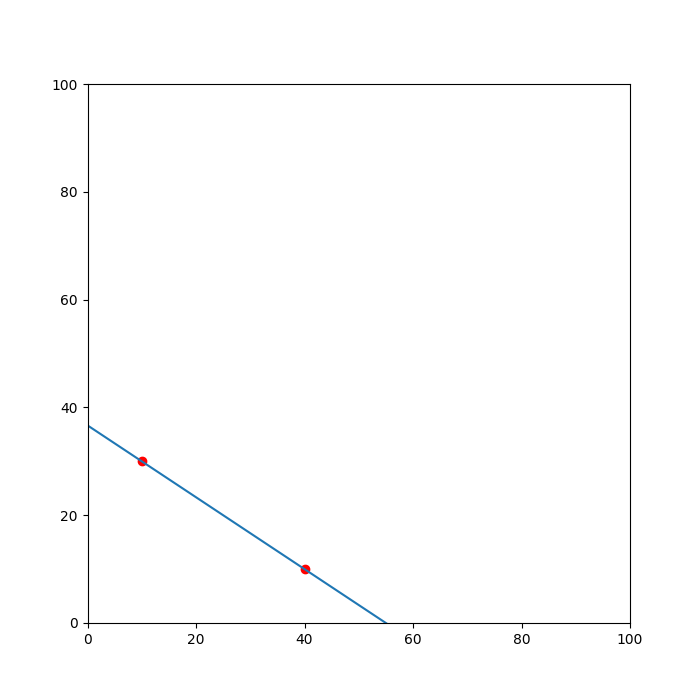

In [21]:
interactive_linear_regression = InteractiveLinearRegression(points=[Point(10,30), Point (40, 10)])

In [22]:
interactive_linear_regression.cleanup()
del interactive_linear_regression

In [23]:
del Point

# Logistic Regression

In [24]:
# Define a named tuple called 'Point'
Point = namedtuple('Point', ['x1', 'x2', 'y']) #  y can only be 0 or 1

In [26]:
class InteractiveLogisticRegression:
    def __init__(self, points=[]):
        self.model = LogisticRegression()
        self.points = points
        
        # 2d plot
        fig, ax = plt.subplots(figsize=(7, 7))
        self.fig2d = fig
        self.ax2d = ax
        self.fig2d.canvas.mpl_connect('button_press_event', partial(self.__class__.onclick, self))
        
        # 3d plot
        fig, ax = plt.subplots()
        self.fig3d = fig
        self.ax3d = fig
        
        self.__clear_ax()
        if self.points:
            self.__update_model()
            self.redraw()
        

    def __update_model(self):
        pass
    
    def __clear_ax(self):
        self.ax2d.clear()
        self.ax2d.set_xlim(0, 100)
        self.ax2d.set_ylim(0, 100)
        self.ax2d.set_xlabel("x1")
        self.ax2d.set_ylabel("x2")

    def __plot_points(self):
        self.ax2d.plot([p.x1 for p in self.points if p.y==1], 
                       [p.x2 for p in self.points if p.y==1], 
                       'bo')  # 'bo' specifies a blue circle marker
        self.ax2d.plot([p.x1 for p in self.points if p.y==0], 
                       [p.x2 for p in self.points if p.y==0], 
                       'ko')  # 'ko' specifies a black circle marker

    def __plot_line(self):
        pass
        # self.ax2d.plot([0, 100], self.model.predict([[0], [100]]))

    def redraw(self):
        self.__clear_ax()
        self.__plot_points()
        self.__plot_line()
        plt.show()
                
    def add_point(self, point):
        self.points.append(point)
        self.__update_model()

    def onclick(self, event):
        # Update the plot with the new point
        if event.button == 1:  # Left mouse button (1) clicked
            self.add_point(Point(event.xdata, event.ydata, 1)) 
        # Update the plot with the new point
        if event.button == 3:  # Right mouse button (3) clicked
            self.add_point(Point(event.xdata, event.ydata, 0))
        self.redraw()

    def cleanup(self):
        plt.close(self.fig2d)
        plt.close(self.fig3d)



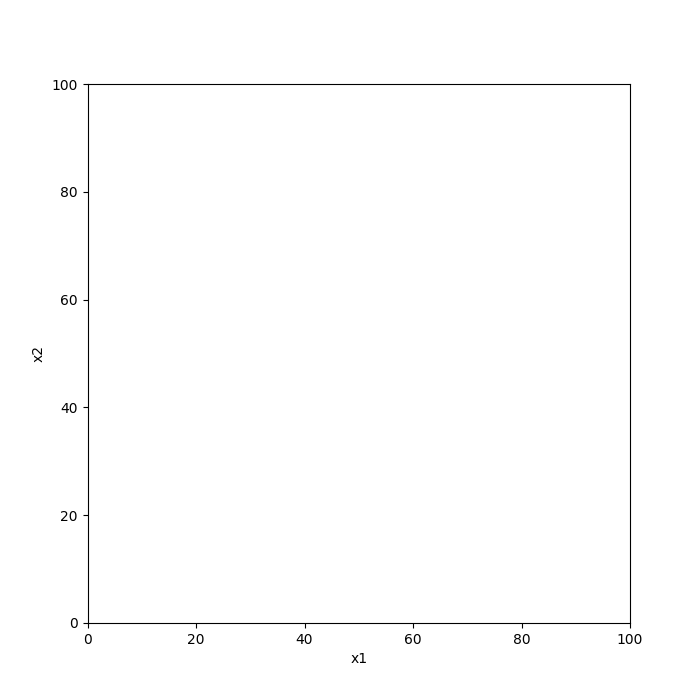

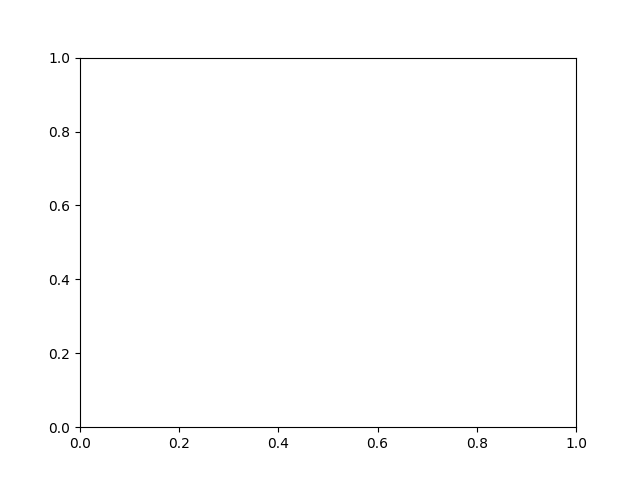

In [27]:
interactive_logistic_regression = InteractiveLogisticRegression()

In [12]:
interactive_logistic_regression.cleanup()
del interactive_logistic_regression